#TEAM: Data Killers!!! 

##Members:
###Andrés Espinosa Sanfiel
###Quique García Vidal
###Héctor Escribano Campos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,recall_score,precision_score,balanced_accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [2]:
url ='https://raw.githubusercontent.com/hecescam/IA3/main/glass.csv'

## Importing data

In [3]:
dataframe = pd.read_csv(url,header=0)

In [4]:
dataframe.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Exploratory data analysis

In [5]:
dataframe.shape

(214, 10)

### Descriptive statistics

In [6]:
dataframe.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Null data analysis

In [7]:
dataframe.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Correlation matrix

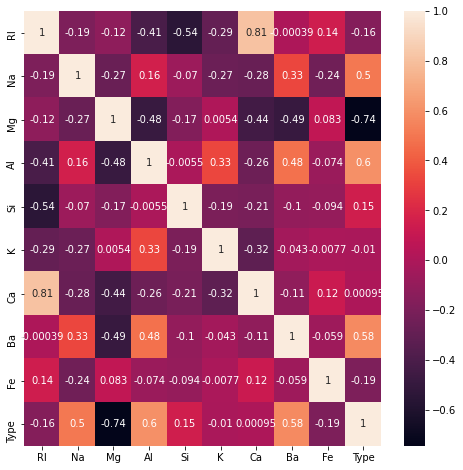

In [10]:
corrMatrix = dataframe.corr()
fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Target variable (Type) distribution

In [12]:
def balanceGraph(data):
  sns.set_theme(style="darkgrid")
  sns.countplot(x=dataframe['Type'],color='b')
  plt.show()


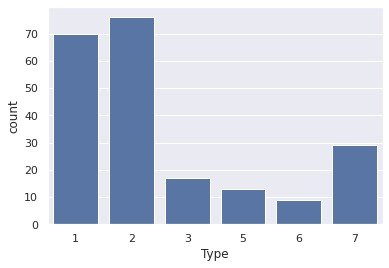

In [13]:
balanceGraph(dataframe)

### Relationship between variables

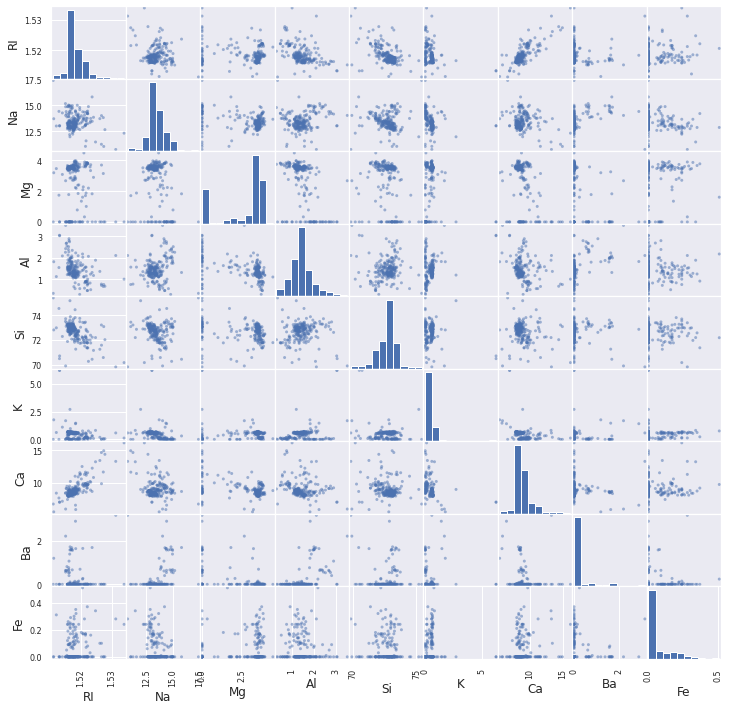

In [14]:
X=dataframe.drop(columns='Type')
Y = dataframe["Type"]
pd.plotting.scatter_matrix(X, figsize=(12.0,12.0));

### Relationship between variables splitted by target

In [15]:
fig = px.scatter_matrix(data_frame=dataframe, dimensions=X.columns, color="Type")
fig.show()

### Features with higher linear correlation (according to correlation matrix)

In [16]:
fig = px.scatter(dataframe, x="Ca", y="RI" , color="Type")
fig.show()

### Data distribution by variable

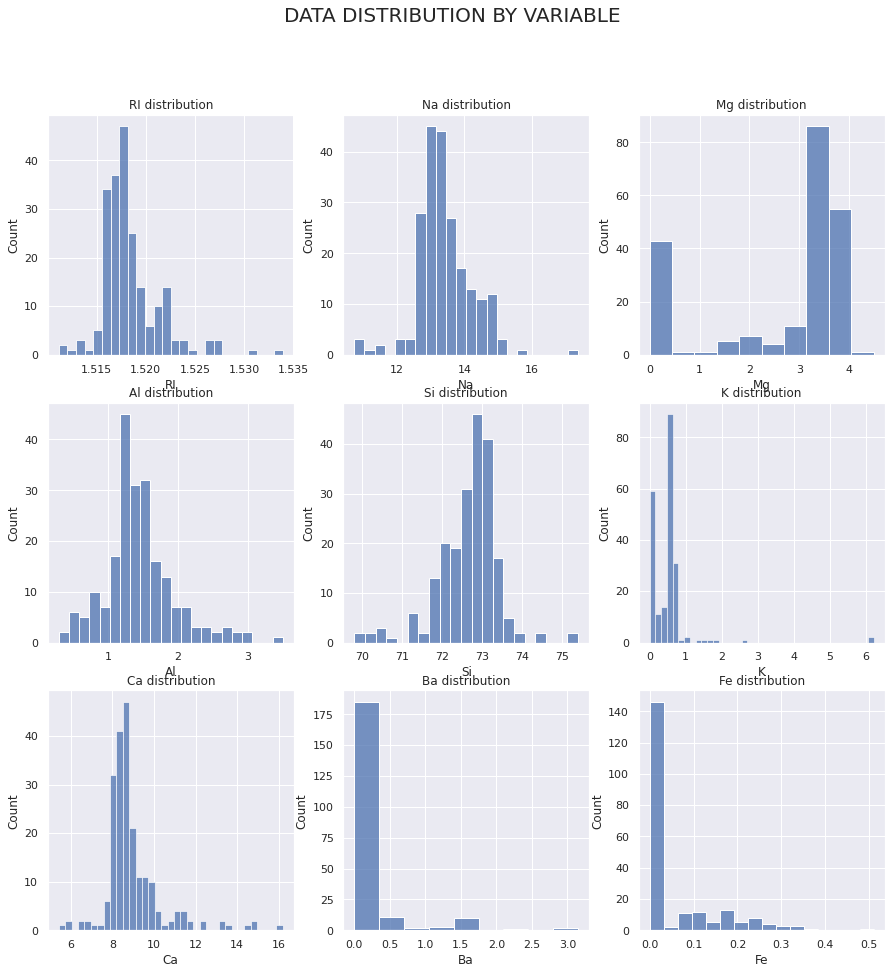

In [17]:
sns.set_style("darkgrid")
f, axes = plt.subplots(3, 3,figsize=(15, 15))
n=0
for i in range(0,3):
  for j in range(0,3):
    sns.histplot(data=X[X.columns[n]] ,ax=axes[i,j]).set(title=f"{X.columns[n]} distribution")
    n+=1

f.suptitle('DATA DISTRIBUTION BY VARIABLE', fontsize=20)
plt.show()

### Outlier analysis by variable

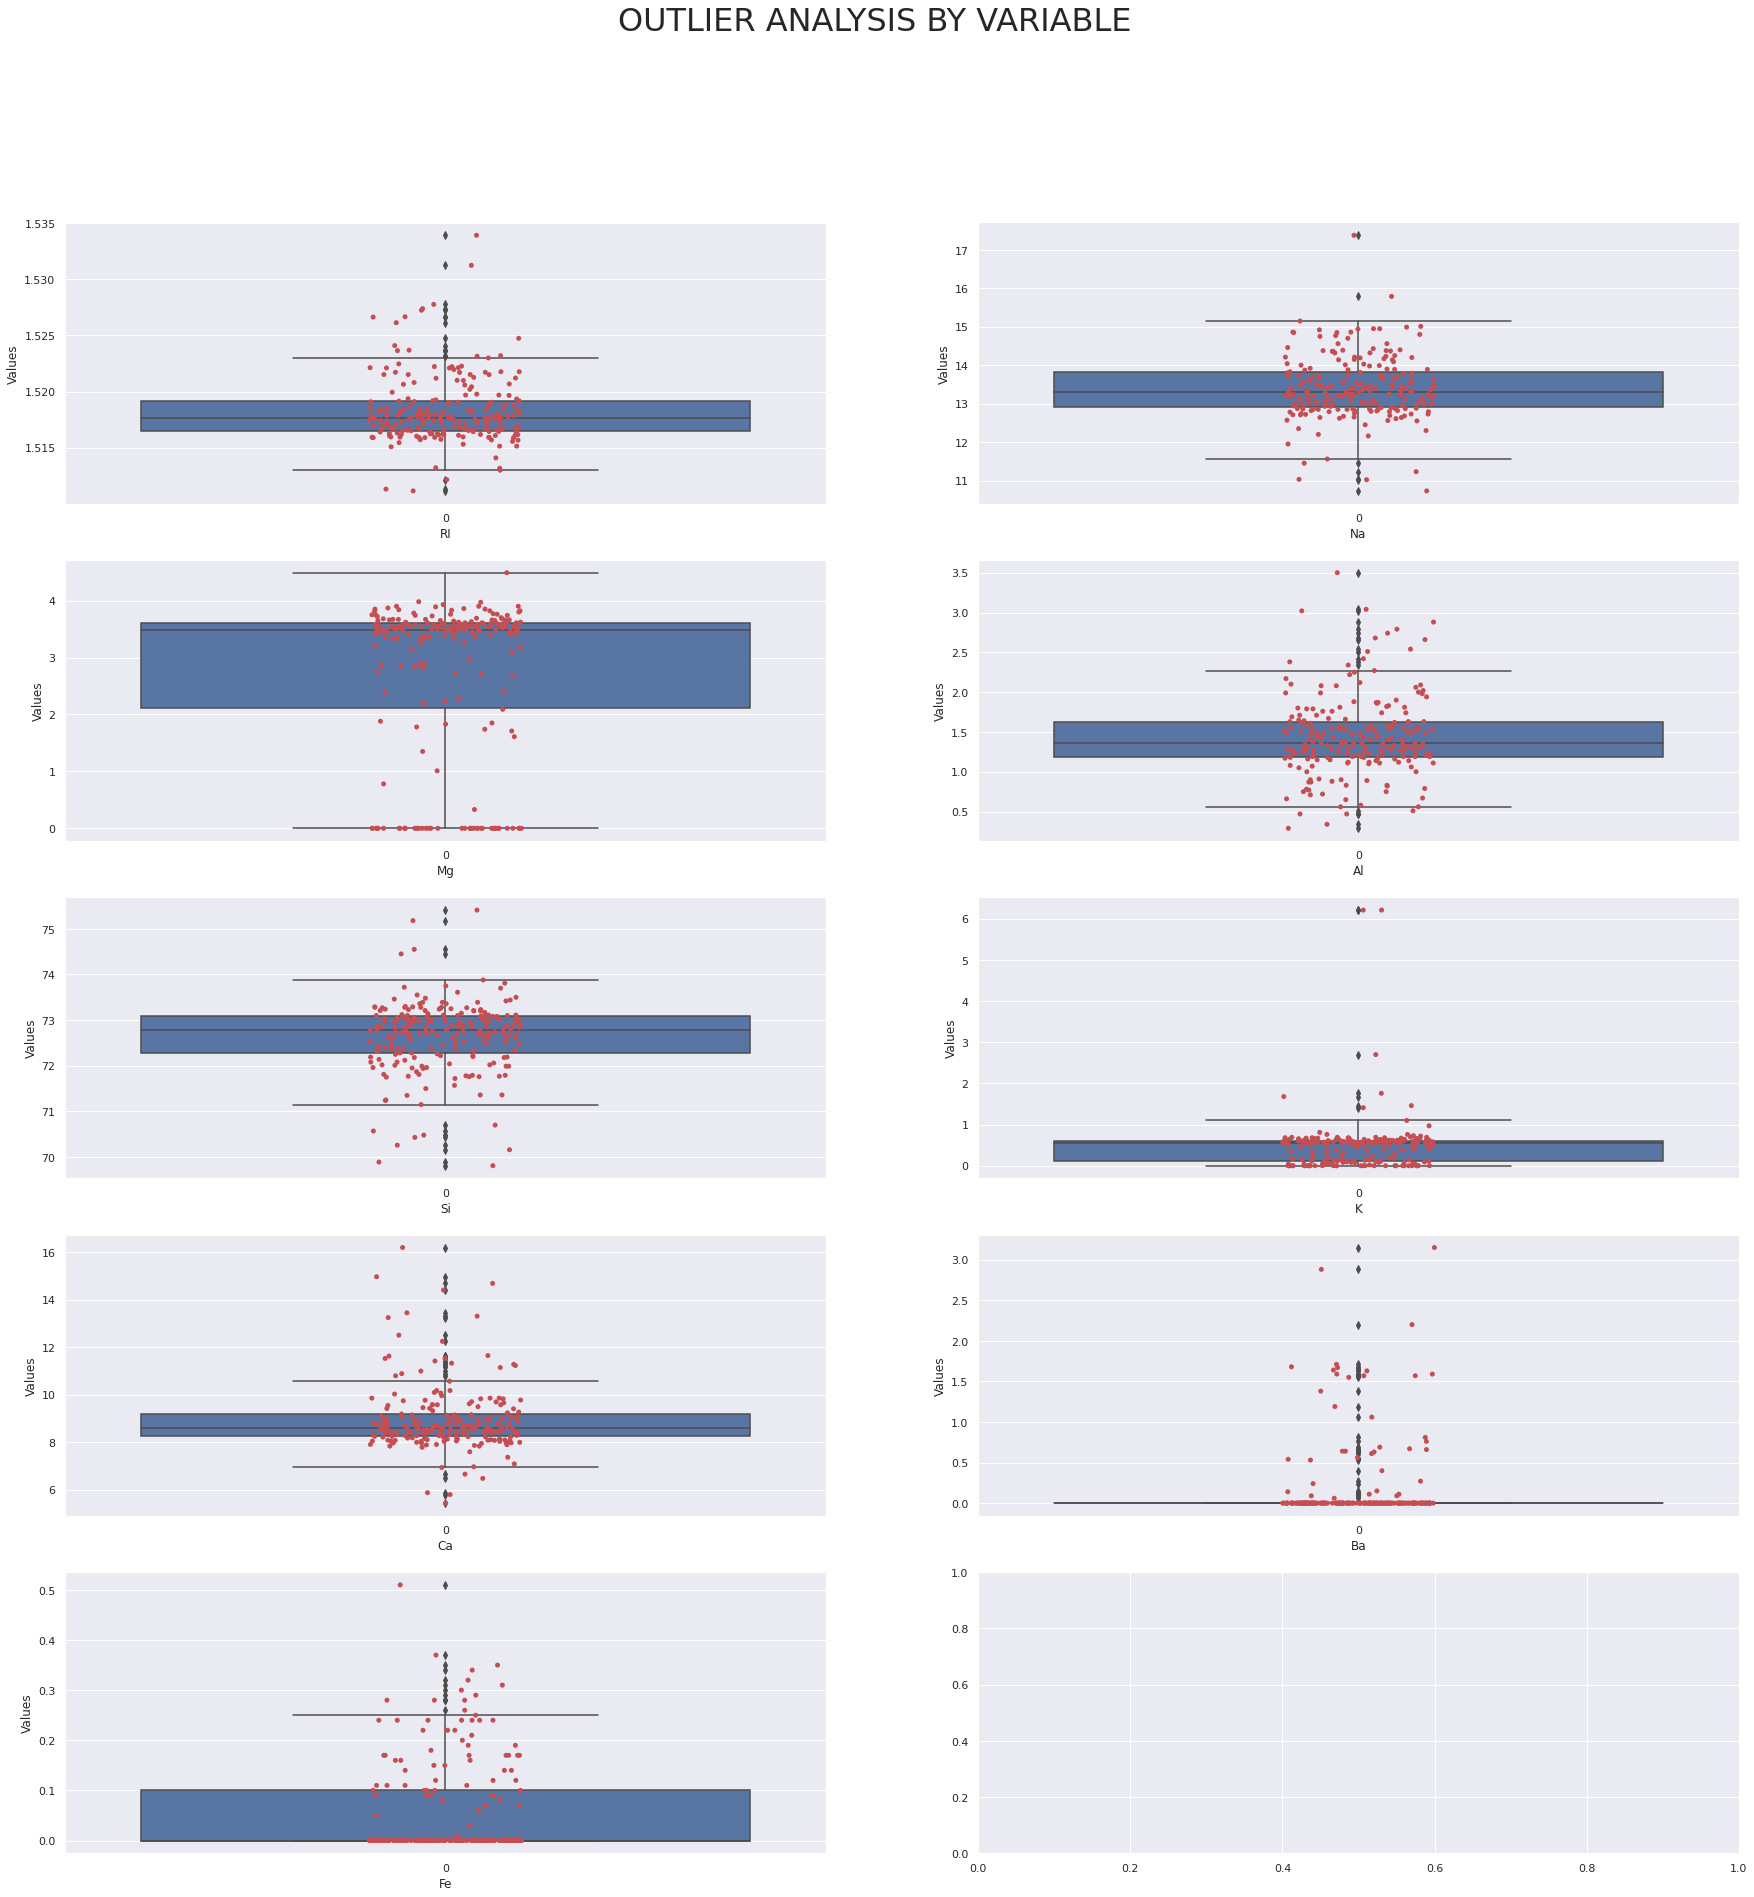

In [18]:
f, axes = plt.subplots(5, 2,figsize=(30, 30))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(data=X[X.columns[n]] ,ax=axes[i,j])
    #sns.swarmplot(data=X[X.columns[n]],color='r', ax=axes[i,j])
    sns.stripplot(data=X[X.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X.columns[n], ylabel='Values')
    n+=1
    if n==len(X.columns):
      break
f.suptitle('OUTLIER ANALYSIS BY VARIABLE', fontsize=32)
plt.show()

### Outlier analysis by variable (splitted by target level)

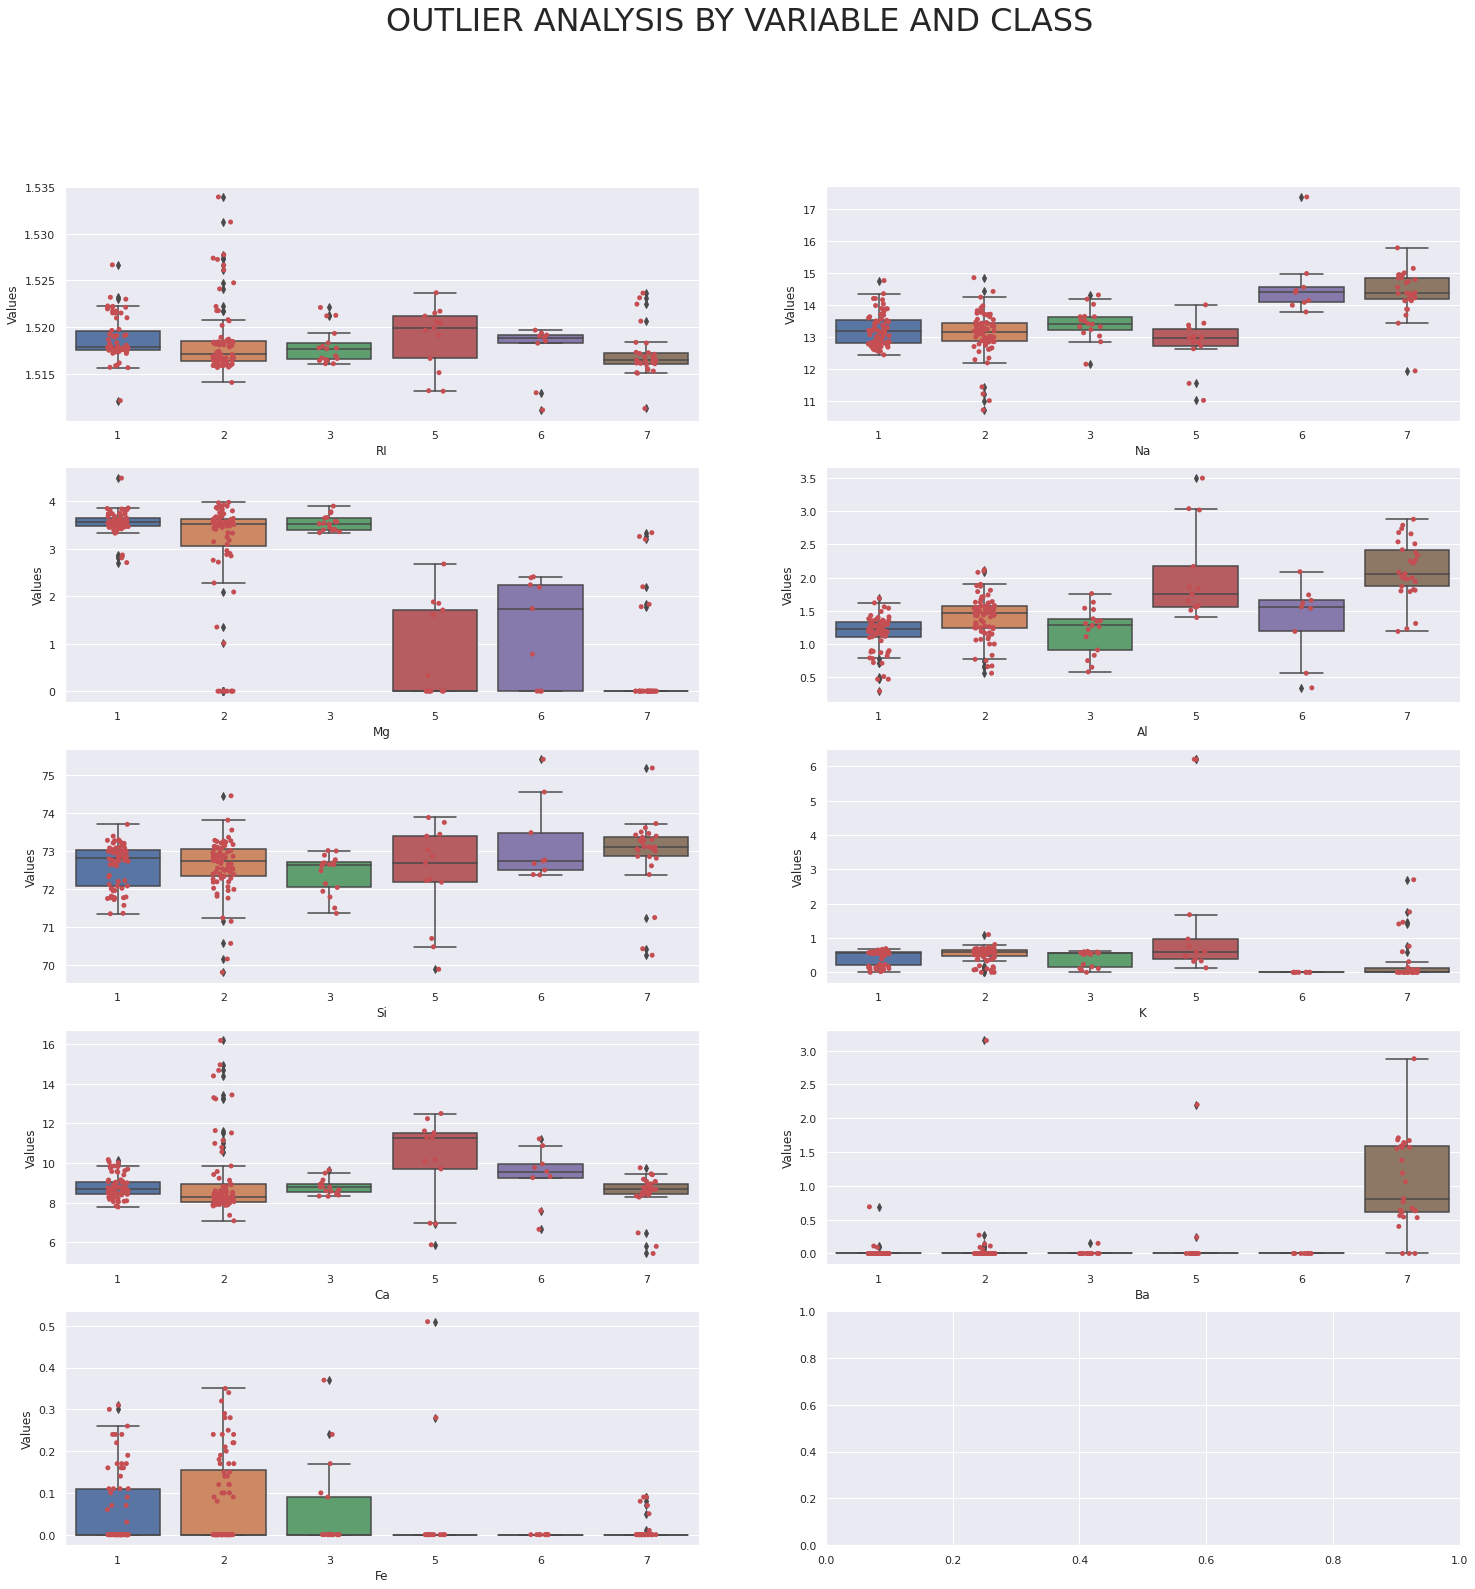

In [19]:
f, axes = plt.subplots(5, 2,figsize=(25, 25))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(x=Y,y=X[X.columns[n]],ax=axes[i,j])
    #sns.swarmplot(x=Y['type_of_glass'],y=X[X.columns[n]],color='r', ax=axes[i,j])
    sns.stripplot(x=Y,y=X[X.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X.columns[n], ylabel='Values')
    n+=1
    if n==len(X.columns):
      break
f.suptitle('OUTLIER ANALYSIS BY VARIABLE AND CLASS', fontsize=32)
plt.show()

### Functions for removing outliers

#### Remove outlier out of each variable distribution function

In [20]:
def outlierByIQR(data,threshold,multiplier):
    list_outlier = []
    variables = list(data.dtypes[data.dtypes != int].index)
    for i,var in enumerate(variables):
      upper_limit = data[var].quantile(q=0.75) + (data[var].quantile(q=0.75) - data[var].quantile(q=0.25))*multiplier
      lower_limit = data[var].quantile(q=0.25) - (data[var].quantile(q=0.75) - data[var].quantile(q=0.25))*multiplier
      print(var, upper_limit, lower_limit)
      skew_variable = data[var].skew()
      if skew_variable > 0.3:
        
        #OUTLIER SUPERIOR
        list_outlier.append(list(data[var]>upper_limit))
      elif skew_variable < -0.3:
        
        #OUTLIER INFERIOR
        list_outlier.append(list(data[var]<lower_limit))
      else:
        print(f"Skew: {skew_variable}")
        print("Otra casuistica")
    data_ = pd.DataFrame(list_outlier).T.replace(True,1).replace(False,0)  
    data = data[~data.index.isin(list(data_[data_.sum(axis=1) >= threshold].index))]
    return data

#### Replace outliers by IQR limit (lower/upper) function

In [22]:
def outlierByMedian(data,multiplier,skew_flag = 0):
    list_outlier = []
    variables = list(data.dtypes[data.dtypes != int].index)
    for i,var in enumerate(variables):
      upper_limit = data[var].quantile(q=0.75) + (data[var].quantile(q=0.75) - data[var].quantile(q=0.25))*multiplier
      lower_limit = data[var].quantile(q=0.25) - (data[var].quantile(q=0.75) - data[var].quantile(q=0.25))*multiplier
      print(var, upper_limit, lower_limit)
      if skew_flag == 1:
        skew_variable = data[var].skew()
        if skew_variable > 0.3:
          print(f"Skew positivo: {skew_variable}")
          #OUTLIER SUPERIOR
          data.loc[data[var]>upper_limit,var] = upper_limit
        elif skew_variable < -0.3:
          print(f"Skew negativo: {skew_variable}")
          #OUTLIER INFERIOR
          data.loc[data[var]<lower_limit,var] = lower_limit
        else:
          print(f"Skew: {skew_variable}")
          print("Otra casuistica")
      else:
        data.loc[data[var]>upper_limit,var] = upper_limit
        data.loc[data[var]<lower_limit,var] = lower_limit

    return data

## Baseline model (without balancing and removing outliers)

## Target balanced model (without removing outliers)

### Split features and target variables

In [23]:
X = dataframe.iloc[:,:9]
y = np.ravel(dataframe.iloc[:,9:],order='C')

### Train/test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

### SMOTE

In [25]:
def smoteModel(X_train, y_train):
  sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)
  X_res, y_res = sm.fit_resample(X_train, y_train)
  return X_res, y_res

In [27]:
X_res, y_res = smoteModel(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

### Random forest classifier (with grid search)

In [30]:
rf = RandomForestClassifier()

In [31]:
param_grid = {'n_estimators' : [40, 60, 80, 100, 120,140,160,180,200],
              'max_depth' : [2,3,4,5,6,7]}

In [32]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)

In [33]:
grid_search.fit(X_res,y_res)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [34]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
y_pred_res = grid_search.best_estimator_.predict(X_res)
y_pred_train = grid_search.best_estimator_.predict(X_train)
y_pred_test = grid_search.best_estimator_.predict(X_test)

#### Defining function for metrics evaluation

In [36]:
def calcMetrics(y_true_balanced,y_pred_balanced,y_true_train, y_pred_train,y_true_test,y_pred_test):
    metrics_df =  pd.DataFrame({"BALANCED TRAIN METRICS":[balanced_accuracy_score(y_true_balanced,y_pred_balanced), 
                                                   #Global micro
                                                   f1_score(y_true_balanced,y_pred_balanced, average="micro"),
                                                   precision_score(y_true_balanced,y_pred_balanced, average="micro"),
                                                   recall_score(y_true_balanced,y_pred_balanced, average="micro"),
                                                   
                                                   #Global weighted
                                                   f1_score(y_true_balanced,y_pred_balanced, average="weighted"),
                                                  precision_score(y_true_balanced,y_pred_balanced, average="weighted"),
                                                   recall_score(y_true_balanced,y_pred_balanced, average="weighted"),

                                                  #By class
                                                  list(np.around(np.array(f1_score(y_true_balanced,y_pred_balanced, average=None)),2)),
                                                  list(np.around(np.array(precision_score(y_true_balanced,y_pred_balanced, average=None)),2)),
                                                  list(np.around(np.array(recall_score(y_true_balanced,y_pred_balanced, average=None)),2))],
                                
                                "TRAIN METRICS":[balanced_accuracy_score(y_true_train, y_pred_train), 
                                                   #Global micro
                                                   f1_score(y_true_train, y_pred_train, average="micro"),
                                                   precision_score(y_true_train, y_pred_train, average="micro"),
                                                   recall_score(y_true_train, y_pred_train, average="micro"),
                                                   
                                                   #Global weighted
                                                   f1_score(y_true_train, y_pred_train, average="weighted"),
                                                  precision_score(y_true_train, y_pred_train, average="weighted"),
                                                   recall_score(y_true_train, y_pred_train, average="weighted"),

                                                  #By class
                                                  list(np.around(np.array(f1_score(y_true_train, y_pred_train, average=None)),2)),
                                                  list(np.around(np.array(precision_score(y_true_train, y_pred_train, average=None)),2)),
                                                  list(np.around(np.array(recall_score(y_true_train, y_pred_train, average=None)),2))],
                                
                                  "TEST METRICS":[balanced_accuracy_score(y_true_test,y_pred_test), 
                                                   #Global micro
                                                   f1_score(y_true_test,y_pred_test, average="micro"),
                                                   precision_score(y_true_test,y_pred_test, average="micro"),
                                                   recall_score(y_true_test,y_pred_test, average="micro"),
                                                   
                                                   #Global weighted
                                                   f1_score(y_true_test,y_pred_test, average="weighted"),
                                                  precision_score(y_true_test,y_pred_test, average="weighted"),
                                                   recall_score(y_true_test,y_pred_test, average="weighted"),
                                                  
                                                  #By class
                                                  list(np.around(np.array(f1_score(y_true_test,y_pred_test, average=None)),2)),
                                                  list(np.around(np.array(precision_score(y_true_test,y_pred_test, average=None)),2)),
                                                  list(np.around(np.array(recall_score(y_true_test,y_pred_test, average=None)),2))]}, 
                               
                                index=["balanced_accuracy","f1_micro","precision_micro","recall_micro","f1_weighted", "precision_weighted","recall_weighted", "f1_class","precision_class","recall_class"])
    
    return metrics_df

In [37]:
metrics_df = calcMetrics(y_res,y_pred_res,y_train, y_pred_train,y_test,y_pred_test)

In [38]:
metrics_df

,BALANCED TRAIN METRICS,TRAIN METRICS,TEST METRICS
balanced_accuracy,0.990741,0.976846,0.765512
f1_micro,0.990741,0.979866,0.753846
precision_micro,0.990741,0.979866,0.753846
recall_micro,0.990741,0.979866,0.753846
f1_weighted,0.990769,0.979936,0.742225
precision_weighted,0.990853,0.980134,0.759902
recall_weighted,0.990741,0.979866,0.753846
f1_class,"[0.97, 0.99, 0.98, 1.0, 1.0, 1.0]","[0.97, 0.99, 0.9, 1.0, 1.0, 1.0]","[0.83, 0.65, 0.62, 0.83, 0.67, 0.86]"
precision_class,"[0.96, 1.0, 0.98, 1.0, 1.0, 1.0]","[0.96, 1.0, 0.9, 1.0, 1.0, 1.0]","[0.74, 0.8, 0.67, 0.71, 0.67, 0.86]"
recall_class,"[0.98, 0.98, 0.98, 1.0, 1.0, 1.0]","[0.98, 0.98, 0.9, 1.0, 1.0, 1.0]","[0.95, 0.55, 0.57, 1.0, 0.67, 0.86]"


## Target balanced model (removing outliers)

### Random forest

In [ ]:
lista_threshold = [1,2,3]
lista_multiplier = [1.5,2,3,5]
for threshold in lista_threshold:
  for multiplier in lista_multiplier:
    
    X_train_split, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
    X_train_split.insert(len(X_train_split.columns),"Target",y_train)
    
    data_train = outlierByIQR(X_train_split,threshold,multiplier)
    print(data_train.shape)
    if not data_train.empty:
      X_train = data_train.iloc[:,:9]
      y_train = np.ravel(data_train.iloc[:,9:],order='C')
      
      #Smote
      sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)
      X_res, y_res = sm.fit_resample(X_train, y_train)

      rf = RandomForestClassifier()

      param_grid = {'n_estimators' : [40, 60, 80, 100, 120,140,160,180,200],
              'max_depth' : [2,3,4,5,6,7],
              'criterion':["gini","entropy"],
              'min_samples_split':[3,4,5]}
      
      grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring=["f1_micro","balanced_accuracy"], refit="balanced_accuracy",
                          cv = 10)
      grid_search.fit(X_res,y_res)

      y_pred_res = grid_search.best_estimator_.predict(X_res)
      y_pred_train = grid_search.best_estimator_.predict(X_train)
      y_pred_test = grid_search.best_estimator_.predict(X_test)

      metrics_df = calcMetrics(y_res,y_pred_res,y_train, y_pred_train,y_test,y_pred_test)

      print("########################################################################")
      print(f"### RESULTADOS PARA THRESHOLD {threshold} Y MULTIPLIER {multiplier} ###")
      print("########################################################################")
      print("MEJOR MODELO: ")
      print(grid_search.best_estimator_)
      print("")
      print(metrics_df)

    else:
      print(f"No hay datos para threshold {threshold} y multiplier {multiplier}")

RI 1.5229499999999998 1.51255
Na 15.339999999999996 11.420000000000002
Skew: 0.2050068582365948
Otra casuistica
Mg 5.39 0.5900000000000005
Al 2.2699999999999996 0.5900000000000001
Si 74.29500000000002 71.13499999999999
K 1.315 -0.565
Ca 10.284999999999997 6.965000000000003
Ba 0.0 0.0
Fe 0.25 -0.15000000000000002
(115, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 1 Y MULTIPLIER 1.5 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                                BALANCED TRAIN METRICS  ...                         TEST METRICS
balanced_accuracy                             0.986111  ...                             0.692496
f1_micro                                      0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 1 Y MULTIPLIER 2 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                              BALANCED TRAIN METRICS  ...                         TEST METRICS
balanced_accuracy                           0.995614  ...                             0.765152
f1_micro                                    0.9956

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 1 Y MULTIPLIER 3 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                               BALANCED TRAIN METRICS  ...                          TEST METRICS
balanced_accuracy                             0.98374  ...                              0.772727
f1_micro                                      0.98

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 1 Y MULTIPLIER 5 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                                BALANCED TRAIN METRICS  ...                          TEST METRICS
balanced_accuracy                             0.992248  ...                              0.710317
f1_micro                                     

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 2 Y MULTIPLIER 1.5 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                                BALANCED TRAIN METRICS  ...                          TEST METRICS
balanced_accuracy                             0.988372  ...                              0.789683
f1_micro                                      

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 2 Y MULTIPLIER 2 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                              BALANCED TRAIN METRICS  ...                         TEST METRICS
balanced_accuracy                           0.996667  ...                             0.797258
f1_micro                                    0.9966

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 2 Y MULTIPLIER 3 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                              BALANCED TRAIN METRICS  ...                          TEST METRICS
balanced_accuracy                           0.996795  ...                              0.781385
f1_micro                                    0.99

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 2 Y MULTIPLIER 5 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                              BALANCED TRAIN METRICS  ...                         TEST METRICS
balanced_accuracy                           0.996914  ...                             0.717172
f1_micro                                    0.99691

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 3 Y MULTIPLIER 1.5 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                               BALANCED TRAIN METRICS  ...                          TEST METRICS
balanced_accuracy                            0.986111  ...                              0.787013
f1_micro                                    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 3 Y MULTIPLIER 2 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                               BALANCED TRAIN METRICS  ...                        TEST METRICS
balanced_accuracy                            0.990385  ...                            0.717532
f1_micro                                     0.9903

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 3 Y MULTIPLIER 3 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                               BALANCED TRAIN METRICS  ...                        TEST METRICS
balanced_accuracy                            0.990741  ...                            0.756494
f1_micro                                     0.990

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 3 Y MULTIPLIER 5 ###
########################################################################
MEJOR MODELO: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

                               BALANCED TRAIN METRICS  ...                         TEST METRICS
balanced_accuracy                            0.987654  ...                              0.81241
f1_micro                                     0.9

### Gradient boosting

In [ ]:
lista_threshold = [1,2,3]
lista_multiplier = [1.5,2,3,5]
for threshold in lista_threshold:
  for multiplier in lista_multiplier:
    
    X_train_split, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
    X_train_split.insert(len(X_train_split.columns),"Target",y_train)
    
    data_train = outlierByIQR(X_train_split,threshold,multiplier)
    print(data_train.shape)
    if not data_train.empty:
      X_train = data_train.iloc[:,:9]
      y_train = np.ravel(data_train.iloc[:,9:],order='C')
      
      #Smote
      sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)
      X_res, y_res = sm.fit_resample(X_train, y_train)

      gb = GradientBoostingClassifier()

      param_grid = {'n_estimators' : [40, 60, 80, 100, 120,140,160,180,200],
              'max_depth' : [2,3,4,5,6,7],
              'min_samples_split':[2,3,4,5]}

      grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, scoring=["f1_micro","balanced_accuracy"], refit="balanced_accuracy", cv = 10)
      grid_search.fit(X_res,y_res)

      y_pred_res = grid_search.best_estimator_.predict(X_res)
      y_pred_train = grid_search.best_estimator_.predict(X_train)
      y_pred_test = grid_search.best_estimator_.predict(X_test)

      metrics_df = calcMetrics(y_res,y_pred_res,y_train, y_pred_train,y_test,y_pred_test)

      print("########################################################################")
      print(f"### RESULTADOS PARA THRESHOLD {threshold} Y MULTIPLIER {multiplier} ###")
      print("########################################################################")
      print("MEJOR MODELO: ")
      print(grid_search.best_estimator_)
      print("")
      print(metrics_df)

    else:
      print(f"No hay datos para threshold {threshold} y multiplier {multiplier}")

RI 1.5229499999999998 1.51255
Na 15.339999999999996 11.420000000000002
Skew: 0.2050068582365948
Otra casuistica
Mg 5.39 0.5900000000000005
Al 2.2699999999999996 0.5900000000000001
Si 74.29500000000002 71.13499999999999
K 1.315 -0.565
Ca 10.284999999999997 6.965000000000003
Ba 0.0 0.0
Fe 0.25 -0.15000000000000002
(115, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 1 Y MULTIPLIER 1.5 ###
########################################################################
MEJOR MODELO: 
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

                            BALANCED TRAIN METRICS  ...                         TEST MET

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

########################################################################
### RESULTADOS PARA THRESHOLD 1 Y MULTIPLIER 2 ###
########################################################################
MEJOR MODELO: 
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

                            BALANCED TRAIN METRICS  ...                         TEST METRI

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

## BEST MODEL 
###(Random Forest-> criterion="entropy" , max_depth=7, n_estimators=120,min_samples_split=3)

In [55]:
rf_bestModel = RandomForestClassifier(criterion="entropy",
                       max_depth=7, 
                       min_samples_leaf=1, 
                       min_samples_split=3,
                       n_estimators=120, 
                       n_jobs=None, 
                       min_weight_fraction_leaf=0.0,
                       oob_score=False, 
                       random_state=None,
                       max_features="auto")

### Transforming data

In [56]:
threshold = 3
multiplier = 2
X_train_split, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
X_train_split.insert(len(X_train_split.columns),"Target",y_train)
data_train = outlierByIQR(X_train_split,threshold,multiplier)

RI 1.5242499999999999 1.5112500000000002
Na 15.829999999999997 10.930000000000003
Skew: 0.2050068582365948
Otra casuistica
Mg 5.989999999999999 -0.009999999999999343
Al 2.4799999999999995 0.3800000000000001
Si 74.69000000000001 70.73999999999998
K 1.5499999999999998 -0.7999999999999999
Ca 10.699999999999996 6.550000000000004
Ba 0.0 0.0
Fe 0.30000000000000004 -0.2


In [57]:
X_train = data_train.iloc[:,:9]
y_train = np.ravel(data_train.iloc[:,9:],order='C')
      
#Smote
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=123)
X_res, y_res = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

###Training model

In [58]:
rf_bestModel.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###Prediction

In [59]:
y_pred_res = rf_bestModel.predict(X_res)
y_pred_train = rf_bestModel.predict(X_train)
y_pred_test = rf_bestModel.predict(X_test)

###Evaluation

In [60]:
metrics_df = calcMetrics(y_res,y_pred_res,y_train, y_pred_train,y_test,y_pred_test)
metrics_df

,BALANCED TRAIN METRICS,TRAIN METRICS,TEST METRICS
balanced_accuracy,0.996795,0.996528,0.828283
f1_micro,0.996795,0.993151,0.784615
precision_micro,0.996795,0.993151,0.784615
recall_micro,0.996795,0.993151,0.784615
f1_weighted,0.996795,0.993278,0.780325
precision_weighted,0.996855,0.993773,0.79222
recall_weighted,0.996795,0.993151,0.784615
f1_class,"[0.99, 1.0, 0.99, 1.0, 1.0, 1.0]","[0.99, 1.0, 0.95, 1.0, 1.0, 1.0]","[0.83, 0.72, 0.57, 0.91, 0.86, 0.92]"
precision_class,"[1.0, 1.0, 0.98, 1.0, 1.0, 1.0]","[1.0, 1.0, 0.91, 1.0, 1.0, 1.0]","[0.76, 0.82, 0.57, 0.83, 0.75, 1.0]"
recall_class,"[0.98, 1.0, 1.0, 1.0, 1.0, 1.0]","[0.98, 1.0, 1.0, 1.0, 1.0, 1.0]","[0.9, 0.64, 0.57, 1.0, 1.0, 0.86]"
